### Case Study  
Duygu Nur Arabaci  

In this notebook I:

- Read in and prepared the data
- Compared several machine learning methods for the best accuracy
- Trained the algorithm with best accuracy
- Evaluated the results

Parameters: This notebook takes the data file "icu_vitals.csv".  

### Importing necessary packages

In [1]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,classification_report,confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Reading in and preparing the data

In [2]:
#Read in the data, and assign the predictors and outcomes
data=pd.read_csv("icu_vitals.csv")

X=data.iloc[:,0:5]
y=data.iloc[:,6]

In [3]:
#Split data into training and test sets
X_train,X_validation,y_train,y_validation=train_test_split(X,y,shuffle=True)

#Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.fit_transform(X_validation)

Predict alarm with Logistic Regression, Decision Tree, Support Vector Machine, K-Nearest Neighbor and Neural Network methods using default sklearn parameters.  
Print the average accuracy scores for training and test splits of shuffled 5-Fold cross validation.

In [4]:
#apply different models after splitting data into test and train and cross validate with kfold 5 times with shuffling

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

kf=KFold(n_splits=5,shuffle=True)
scores=cross_val_score(knn,X,y,cv=kf,scoring='accuracy')

#Defining the models that I want to test
models=[LogisticRegression(), DecisionTreeClassifier(), LinearSVC(), KNeighborsClassifier(), MLPClassifier()]
models_string=["LogisticRegression", "DecisionTree", "LinearSVC", "KNN", "MLPClassifier"]

def scores_calc(model, X, y, trains, kfold):
    """
    Calculates average accuracy scores for training and test splits of cross validation
    Parameters:
        model : function that implements fit and score
        X : scaled data
        y : values
        trains : train data in form (X_train, y_train)
        kfold : KFold value
    Returns : tuple of form (<training scores>, <test scores>)
    """
    model.fit(trains[0],trains[1])
    test_scores = cross_val_score(model,X,y,cv=kf,scoring='accuracy').mean()
    training_scores = model.score(trains[0],trains[1])
    return((training_scores,test_scores))

rows = []
i = 0
for model in models:
    scores = scores_calc(model, X, y, (X_train, y_train), kf)
    rows.append([models_string[i], scores[0], scores[1]])
    i += 1
df = pd.DataFrame(np.array(rows), columns=["model", "train", "test"])
display(df)

C:\Users\Lyra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lyra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lyra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lyra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lyra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

,model,train,test
0,LogisticRegression,0.8978709248170326,0.9101780505042015
1,DecisionTree,1.0,0.902699867061435
2,LinearSVC,0.908183632734531,0.7261182250366593
3,KNN,0.9447771124417831,0.9056886497862708
4,MLPClassifier,0.9251497005988024,0.9243981183122095


### Model

In [5]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,
                        activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, y_train)

predictions=mlp_clf.predict(X_validation)

### Evaluation of the model

              precision    recall  f1-score   support

       False       0.98      0.63      0.77      3449
        True       0.29      0.92      0.44       559

    accuracy                           0.67      4008
   macro avg       0.63      0.78      0.60      4008
weighted avg       0.88      0.67      0.72      4008

              precision    recall  f1-score   support

       False       1.00      0.79      0.88       867
        True       0.42      0.98      0.59       135

    accuracy                           0.82      1002
   macro avg       0.71      0.88      0.73      1002
weighted avg       0.92      0.82      0.84      1002



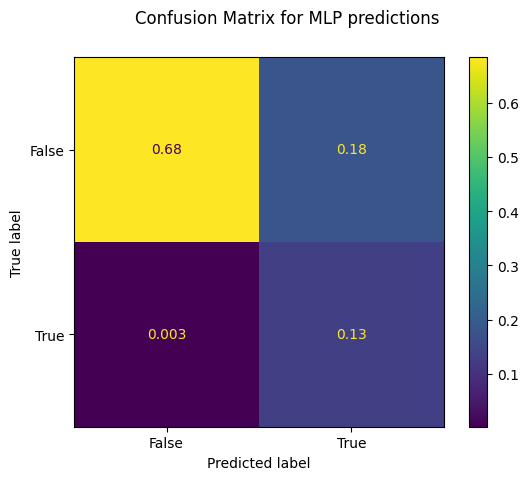

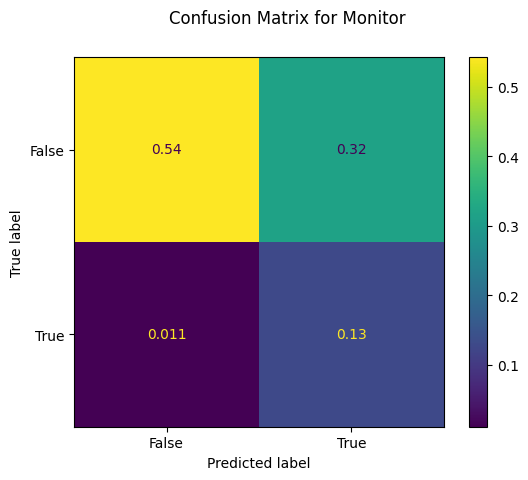

In [6]:
#Evaluating the model with classification report and confusion matrix, and comparing it to the monitor alarms

monitor_alarms=data.iloc[:,5]
print(classification_report(y,monitor_alarms))
print(classification_report(y_validation, predictions))

cnf = confusion_matrix(y_validation, predictions)

disp = ConfusionMatrixDisplay.from_predictions(y_validation, predictions,
                            display_labels=mlp_clf.classes_, 
                            normalize="all")

#confusion matrix for the original monitor for comparison
doctor_alarms=data.iloc[:,6]
cnf_monitor = confusion_matrix(doctor_alarms, monitor_alarms)

fig = ConfusionMatrixDisplay.from_predictions(doctor_alarms, monitor_alarms,
                            display_labels=mlp_clf.classes_, 
                            normalize="all")

disp.figure_.suptitle("Confusion Matrix for MLP predictions")
fig.figure_.suptitle("Confusion Matrix for Monitor")
plt.show()